<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1 )
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

**Day1**

1. **[Logistic Regression Model](#logreg)**

**Day2**

2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import cohen_kappa_score,log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# import function to perform feature selection
from sklearn.feature_selection import RFE# type your code here# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# import function to perform feature selection
from sklearn.feature_selection import RFE

#### Load the csv file

In [2]:
# type your code here
df = pd.read_csv('Heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0


### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here
df['CVD'].value_counts()

0    3596
1     644
Name: CVD, dtype: int64

In [4]:
df.shape

(4240, 16)

In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(3658, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
x = df[['diaBP','sysBP','BPMeds']]
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)
logreg = sm.Logit(ytrain, xtrain).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.402969
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2556
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Sep 2023   Pseudo R-squ.:                 0.05573
Time:                        13:59:30   Log-Likelihood:                -1031.6
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 3.204e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8638      0.395    -12.302      0.000      -5.639      -4.089
diaBP         -0.0081      0.007     -1.161      0.246      -0.022       0.006
sysBP          0.0280      0.004      7.411      0.000       0.021       0.035
BPMeds         0.2445      0.269      0.909      0.363      -0.283       0.772
==============================================================================
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0


In [9]:
x = df[['male','currentSmoker', 'prevalentStroke','diabetes']]
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)
logreg = sm.Logit(ytrain, xtrain).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.418738
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2555
Method:                           MLE   Df Model:                            4
Date:                Fri, 08 Sep 2023   Pseudo R-squ.:                 0.01878
Time:                        13:59:30   Log-Likelihood:                -1072.0
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 2.643e-08
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.0300      0.094    -21.642      0.000      -2.214      -1.846
male                0.4595      0.114      4.043      0.000       0.237       0.682
currentSmoker       0.0769      0.114      0.676      0.499      -0.146       0.300
prevalentStroke     1.2752      0.634      2.011      0.044       0.032       2.518
diabetes            1.1815      0.253      4.669      0.000       0.686       1.677
===================================================================================
"""

In [10]:
odds = np.exp(logreg.params)
odds

const             0.131334
male              1.583293
currentSmoker     1.079971
prevalentStroke   3.579362
diabetes          3.259100
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here

In [12]:
contingency_table = pd.crosstab(df['prevalentHyp'], df['CVD'])
contingency_table

CVD,0,1
prevalentHyp,,
0,2245,273
1,856,284


In [13]:

# Extract counts
A = contingency_table.loc[1, 1]
B = contingency_table.loc[1, 0]
C = contingency_table.loc[0, 1]
D = contingency_table.loc[0, 0]

# Calculate the odds ratio
odds_ratio = (A * D) / (B * C)

print("Odds Ratio:", odds_ratio)

Odds Ratio: 2.7283386395535927


<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here

In [15]:
x = df.drop('CVD',axis = 1)
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)
logreg5 = sm.Logit(ytrain, xtrain).fit()
logreg5.summary()
ypred5 = logreg5.predict(xtest)

Optimization terminated successfully.
         Current function value: 0.375656
         Iterations 7


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here

In [17]:
x = df.drop('CVD',axis = 1)
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)
logreg = sm.Logit(ytrain, xtrain).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.375656
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2544
Method:                           MLE   Df Model:                           15
Date:                Fri, 08 Sep 2023   Pseudo R-squ.:                  0.1197
Time:                        13:59:35   Log-Likelihood:                -961.68
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 5.000e-47
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.9781      0.868    -10.342      0.000     -10.680      -7.277
male                0.5265      0.131      4.016      0.000       0.270       0.783
age                 0.0659      0.008      8.159      0.000       0.050       0.082
education          -0.0312      0.058     -0.533      0.594      -0.146       0.083
currentSmoker       0.2281      0.188      1.212      0.225      -0.141       0.597
cigsPerDay          0.0127      0.008      1.676      0.094      -0.002       0.028
BPMeds              0.1034      0.279      0.371      0.711      -0.444       0.650
prevalentStroke     0.5544      0.676      0.820      0.412      -0.770       1.879
prevalentHyp        0.1088      0.165      0.657      0.511      -0.216       0.433
diabetes            0.0349      0.365      0.096      0.924      -0.680       0.750
totChol             0.0030      0.001      2.223      0.026       0.000       0.006
sysBP               0.0159      0.005      3.471      0.001       0.007       0.025
diaBP               0.0010      0.008      0.124      0.901      -0.014       0.016
BMI                 0.0057      0.015      0.372      0.710      -0.024       0.035
heartRate          -0.0052      0.005     -1.047      0.295      -0.015       0.005
glucose             0.0080      0.003      2.908      0.004       0.003       0.013
===================================================================================
"""

In [18]:
significant variable are those with p valus <0.05
male,age,totChol,sysBP,glucose

SyntaxError: invalid syntax (3564167343.py, line 1)

In [ ]:
x = df[['male','age','totChol','sysBP','glucose']]
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)
logreg = sm.Logit(ytrain, xtrain).fit()
logreg.summary()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# type your code here
exponents of odds ratio will give you the affect of that particular feature on target cariable.
odds ratio = =exp(coeff).
an odds ratio > 1 implies it will that increase in feature will result in higher odds of person having CVD

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here

In [20]:
x = df.drop('CVD',axis = 1)
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)
logreg = sm.Logit(ytrain, xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.375656
         Iterations 7


In [21]:
ypred_prob = logreg.predict(xtest)
ypred = pd.DataFrame([1 if i > 0.5 else 0 for i in ypred_prob])

In [22]:
cm = confusion_matrix(ypred,ytest)

In [23]:
cm

array([[923, 153],
       [  8,  14]], dtype=int64)

In [24]:
accuracy = (cm[0][0] + cm[1][1])/sum(sum(cm))

In [25]:
accuracy

0.8533697632058288

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
ypred_prob = logreg.predict(xtest)
ypred = pd.DataFrame([1 if i > 0.18 else 0 for i in ypred_prob])
kappa = cohen_kappa_score(ytest, ypred)
kappa

0.21566304418842686

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

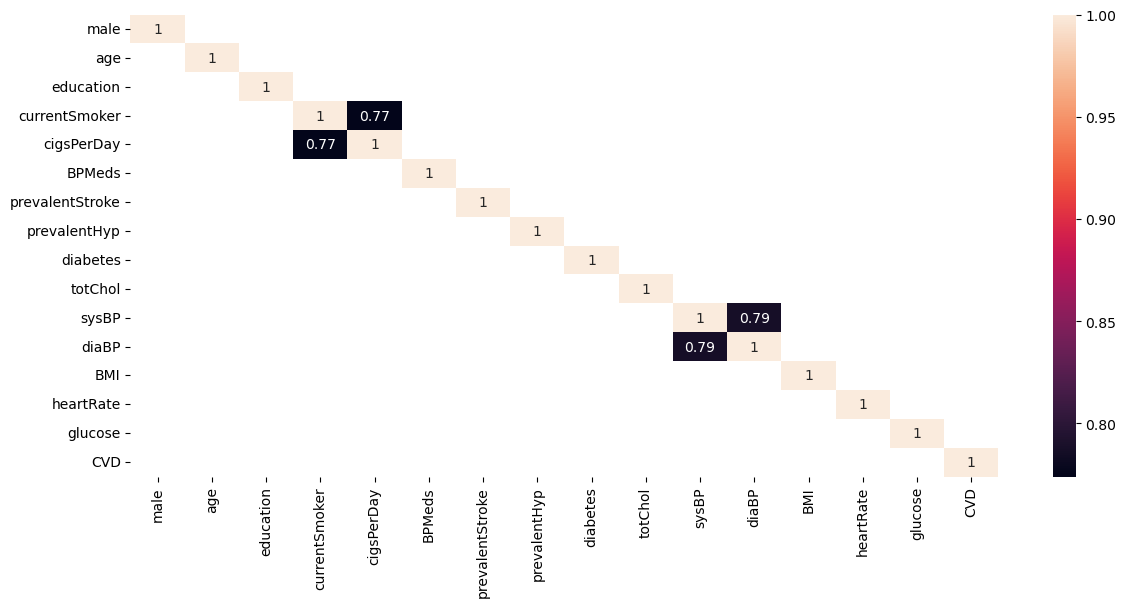

In [27]:
# type your code here
plt.figure(figsize=(14,6))
sns.heatmap(df.corr()[(df.corr() >= 0.75) | (df.corr() <= -0.75)],annot = True)
plt.show()

In [74]:
['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CVD', 'intercept']

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CVD', 'intercept'],
      dtype='object')

In [75]:
x = df.drop(['CVD','sysBP'],axis = 1)
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)
logreg = sm.Logit(ytrain, xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.378019
         Iterations 7


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here

In [82]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a classifier (replace with your own classifier)
lr = LogisticRegression()

# Define the SequentialFeatureSelector with the desired settings
sfs = SFS(estimator=lr, 
          k_features=5,  # Number of features to select
          forward=True,  # Forward selection
          floating=False,  # No floating feature selection
#           verbose=2,  # Verbose output
          scoring='accuracy',  # Scoring metric
          cv=3)  # Cross-validation folds

# Fit the SFS on the training data
sfs = sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features_indices = sfs.k_feature_idx_
# Transform the training and testing data to include only the selected features
X_train_selected = X_train.iloc[:, list(selected_features_indices)]
X_test_selected = X_test.iloc[:, list(selected_features_indices)]

# Train a classifier on the selected features
lr.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test_selected)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)


Accuracy with selected features: 0.8306010928961749


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [95]:
# type your code here
print("Accuracy with selected features:", accuracy)

x = df.iloc[:,list(selected_features_indices)]
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)

logreg12 = sm.Logit(ytrain, xtrain).fit()
ytest_prob = logreg12.predict(xtest)
ypred = [ 0 if x < 0.5 else 1 for x in ytest_prob]
report = classification_report(ytest, ypred)
print(report)

Accuracy with selected features: 0.8306010928961749
Optimization terminated successfully.
         Current function value: 0.399854
         Iterations 6
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       931
           1       0.38      0.04      0.07       167

    accuracy                           0.84      1098
   macro avg       0.61      0.51      0.49      1098
weighted avg       0.78      0.84      0.79      1098



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
# type your code here

#5
x = df.drop('CVD',axis = 1)
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)
logreg5 = sm.Logit(ytrain, xtrain).fit()
ytest_prob5 = logreg5.predict(xtest)
ypred5 = [ 0 if x < 0.5 else 1 for x in ytest_prob]
fpr5, tpr5, thresholds5 = roc_curve(ytest, ypred5)

#12
x = df.iloc[:,list(selected_features_indices)]
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)

logreg12 = sm.Logit(ytrain, xtrain).fit()
ytest_prob12 = logreg12.predict(xtest)
ypred12 = [ 0 if x < 0.5 else 1 for x in ytest_prob]
fpr12, tpr12, thresholds12 = roc_curve(ytest, ypred12)
fpr12, tpr12, thresholds12 = roc_curve(ytest, ypred12)




Optimization terminated successfully.
         Current function value: 0.375656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399854
         Iterations 6


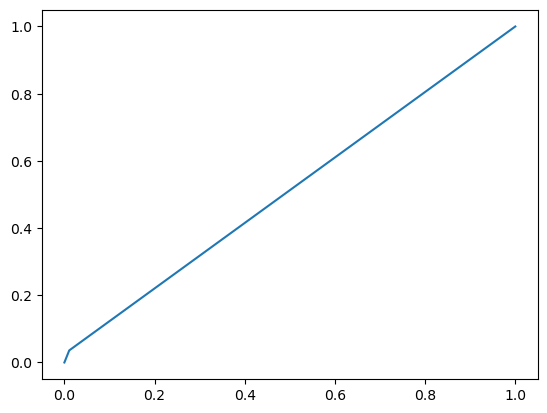

In [116]:
plt.plot(fpr5, tpr5)
plt.show()

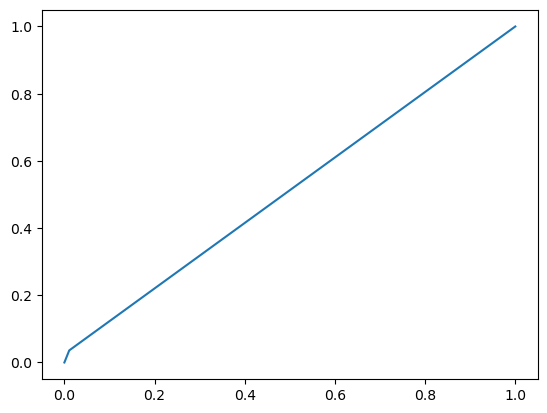

In [118]:
plt.plot(fpr12,tpr12)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [119]:
# type your code here

In [120]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD,intercept
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0,1
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0,1
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0,1
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0,1


In [142]:
x = df['heartRate']
y = df['CVD']
xc = sm.add_constant(x)
lr = LogisticRegression()
xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)
lr_model14 = lr.fit(xtrain,ytrain)
y_prob14 = lr_model14.predict_proba(xtest)[:, 1]
auc_score = roc_auc_score(ytest, y_prob14)

In [143]:
auc_score

0.5189835152466281

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [146]:
# type your code here
cross_entropy = log_loss(ytest, y_prob14)
print(cross_entropy)

0.42609672400163917


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [150]:
# type your code here
print('Logloss for 14th:',log_loss(ytest, y_prob14))
print('Logloss for 5th',log_loss(ytest, ypred5))

Logloss for 14th: 0.42609672400163917
Logloss for 5th 0.38021779345865525


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [151]:
# type your code here
print('Logloss for 5th',log_loss(ytest, ypred5))

Logloss for 5th 0.38021779345865525


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [155]:
# type your code here

x = df[['currentSmoker','cigsPerDay']]
y = df['CVD']
xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)

logreg12 = sm.Logit(ytrain, xtrain).fit()
ytest_prob = logreg12.predict(xtest)
ypred = [ 0 if x < 0.5 else 1 for x in ytest_prob]
report = classification_report(ytest, ypred)
print(report)

Optimization terminated successfully.
         Current function value: 0.425482
         Iterations 6
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       931
           1       0.00      0.00      0.00       167

    accuracy                           0.85      1098
   macro avg       0.42      0.50      0.46      1098
weighted avg       0.72      0.85      0.78      1098



<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [218]:
# type your code here
x = df.drop('CVD', axis = 1)
y = df['CVD']

xc = sm.add_constant(x)

xtrain,xtest,ytrain,ytest = train_test_split(xc,y,test_size=0.3, random_state=1)

logreg12 = sm.Logit(ytrain, xtrain).fit()
ytest_prob = logreg12.predict(xtest)
ypred = [ 0 if x < 0.5 else 1 for x in ytest_prob]
fpr, tpr, thresholds = roc_curve(ytest, ytest_prob)
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table.sort_values('Difference', ascending = False).head()
#optimal threshold = 0.131867

Optimization terminated successfully.
         Current function value: 0.375656
         Iterations 7


,TPR,FPR,Threshold,Difference
176,0.778443,0.402793,0.131867,0.375650
174,0.772455,0.399570,0.132889,0.372885
178,0.784431,0.412460,0.129418,0.371971
172,0.766467,0.396348,0.134819,0.370119
175,0.772455,0.402793,0.132539,0.369662


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [190]:
# type your code here

321.4